<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/7lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 7: РОЗРОБКА СІАМСЬКОЇ МЕРЕЖІ (SIAMESE NETWORKS)

##*Мета роботи:*

Ознайомитись із принципами роботи сіамських мереж, їх
застосуваннями в завданнях порівняння та верифікації об'єктів, а також
навчитися практичним навичкам створення та навчання сіамської мережі в Keras.

Виконала студентка групи БС-25 Аль Хмуз Карина Бассамівна (1 варіант)

##*Теоретична частина:*

***Сіамська мережа*** – це архітектура нейронних мереж, яка використовується,
головним чином, для вирішення задачі порівняння або визначення схожості між
двома входами. Вона складається з двох ідентичних підмереж, які розділяють ті ж самі параметри та ваги. Обидві підмережі приймають різні вхідні дані та виводять ознаки, які потім порівнюються.

**Основна ідея:**

- *Схожість:* Основна мета сіамської мережі – визначити, наскільки схожі між
собою два вхідні зразка. Замість класичного класифікаційного виводу, який
каже, до якого класу належить зразок, сіамська мережа визначає ступінь
схожості між двома зразками.

- *Спільне навчання:* Обидві підмережі в сіамській архітектурі навчаються
одночасно. Якщо покращуються ознаки, що виділяються однією
підмережею, це також покращує ознаки, що виділяються іншою.

- *Оцінка відстані:* Після того як обидві підмережі вивели свої ознаки для
вхідних даних, відстань між цими ознаками визначається за допомогою
деякої метрики (наприклад, евклідова відстань).

- *Порогове значення:* Якщо обчислена відстань менша за певне порогове
значення, зразки вважаються схожими, в іншому випадку – різними.

- *Особливості застосування:* Сіамські мережі часто використовуються у
задачах, де доступні малі набори даних, таких як верифікація обличчя.
Замість навчання на величезних датасетах з тисячами класів, сіамська
мережа може навчатися, порівнюючи лише кілька зразків кожного класу, і
все одно розпізнавати нові приклади цих класів.

**Особливості архітектури Сіамських мереж.**

1. Двійкові підмережі:

Сіамська мережа має дві підмережі, які зазвичай є ідентичними та ділять однакові
параметри. Ці підмережі використовуються для видобутку ознак з двох окремих
вхідних даних.

2. Ваги розділяються:

Обидві підмережі ділять однакові ваги, що означає, що вони одночасно
оновлюються під час процесу навчання.

3. Відстань між ознаками:

Після того, як ознаки видобуто з обох підмереж, вони порівнюються. Зазвичай
використовується евклідова відстань або інші метрики для визначення схожості
між двома наборами ознак.

4. Контрастна втрата (contrastive loss):

Для навчання сіамської мережі зазвичай використовується контрастна втрата. Ця
функція втрати вимірює, наскільки близько ознаки схожих об'єктів і наскільки
далеко ознаки різних об'єктів.

5. Якір, позитивний та негативний приклади:

Під час тренування зазвичай використовуються три зразки: "якір" (основний
зразок), позитивний зразок (той, що схожий на якір) та негативний зразок (той, що відрізняється від якоря). Це стимулює мережу правильно розпізнавати схожі та відмінні об'єкти.


##Практична частина

###Етап 1: Створення сіамської мережі

Так як я, Аль Хмуз Карина Бассамівна маю перший варіант, то датасет для мого завдання - **Fashion MNIST**

Для початку ми завантажимо датасет Fashion MNIST та зробимо огляд даних, щоб зрозуміти його структуру та типи зображень.

Train data shape: (60000, 28, 28), Train labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


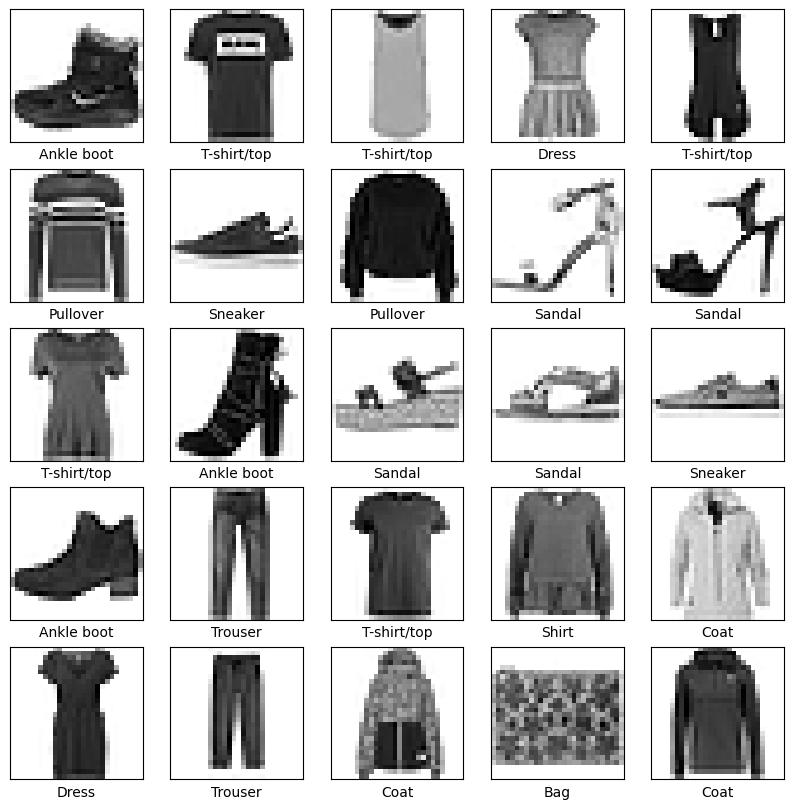

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Завантаження датасету
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Виведення розмірів датасету
print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

# Візуалізація прикладів із датасету
def plot_samples(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Класи в датасеті
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_samples(x_train, y_train, class_names)


Зображення в датасеті Fashion MNIST мають низьку якість через їх розмір — 28x28 пікселів. Це зроблено для збереження компактності даних, прискорення обчислень і зниження вимог до апаратного забезпечення.

*датасет спочатку розроблявся для тестування алгоритмів машинного навчання. Навіть така низька роздільна здатність дозволяє отримати важливі ознаки для класифікації за допомогою нейронних мереж.

Наступним кроком буде підготовка даних для сіамської мережі. Нам потрібно створити пари зображень для навчання моделі та вказати мітки, які позначають, чи є зображення в парі схожими (з одного класу) чи різними (з різних класів).

In [19]:
def create_pairs(images, labels):
    pairs = []
    labels_pairs = []
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    min_samples = min([len(indices) for indices in digit_indices]) - 1

    for digit in range(10):
        for i in range(min_samples):
            # Позитивна пара (схожі зображення)
            z1, z2 = digit_indices[digit][i], digit_indices[digit][i + 1]
            pairs += [[images[z1], images[z2]]]
            labels_pairs += [1]

            # Негативна пара (різні зображення)
            inc = np.random.randint(1, 10)
            dn = (digit + inc) % 10
            z1, z2 = digit_indices[digit][i], digit_indices[dn][i]
            pairs += [[images[z1], images[z2]]]
            labels_pairs += [0]

    return np.array(pairs), np.array(labels_pairs)

# Створення пар для тренувального та тестового наборів
train_pairs, train_labels = create_pairs(x_train, y_train)
test_pairs, test_labels = create_pairs(x_test, y_test)

# Перевірка форми даних
print(f"Train pairs shape: {train_pairs.shape}, Train labels shape: {train_labels.shape}")
print(f"Test pairs shape: {test_pairs.shape}, Test labels shape: {test_labels.shape}")


Train pairs shape: (119980, 2, 28, 28), Train labels shape: (119980,)
Test pairs shape: (19980, 2, 28, 28), Test labels shape: (19980,)


Ми успішно створили пари для навчання та тестування.

- Train pairs shape: (119980, 2, 28, 28): Маємо 119,980 пар зображень у тренувальному наборі. Кожна пара складається з двох зображень розміром 28x28 пікселів.

- Train labels shape: (119980,): Для кожної пари є відповідна мітка (1 — схожі, 0 — різні).

- Test pairs shape: (19980, 2, 28, 28): Тестовий набір містить 19,980 пар зображень.

- Test labels shape: (19980,): Відповідні мітки для тестових пар.


Тепер ми побудуємо базову підмережу для нашої сіамської мережі. Це підмережа, яка буде використовуватись для витягування ознак із кожного зображення в парі.

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

In [21]:
def create_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input_layer, x)

# Ініціалізація базової підмережі
input_shape = (28, 28)
base_network = create_base_network(input_shape)

# Перевірка структури базової підмережі
base_network.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

Чудово, наша базова підмережа готова! Це означає, що ми можемо використовувати її для витягування ознак із зображень у нашій сіамській мережі.

Тепер ми створимо повну сіамську мережу, яка прийматиме пари зображень і порівнюватиме їх за допомогою евклідової відстані.

In [22]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

In [23]:
# Функція для обчислення евклідової відстані
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

# Вхідні шари для пар зображень
input_a = Input(shape=(28, 28))
input_b = Input(shape=(28, 28))

# Пропускання обох входів через базову підмережу
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Обчислення відстані між ознаками
distance = Lambda(euclidean_distance)([processed_a, processed_b])

# Побудова моделі
from tensorflow.keras.models import Model
model = Model(inputs=[input_a, input_b], outputs=distance)

# Огляд архітектури моделі
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │        133,504 │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

Тепер ми компілюємо модель, використовуючи функцію втрат contrastive loss, і навчаємо її на підготовлених парах.

In [24]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [25]:
# Функція втрат для сіамської мережі
def contrastive_loss(y_true, y_pred):
    margin = 1
    y_true = K.cast(y_true, 'float32')
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)

# Компіляція моделі
model.compile(loss=contrastive_loss, optimizer=RMSprop(), metrics=["accuracy"])

# Навчання моделі
history = model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_labels),
    batch_size=128,
    epochs=10
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4887 - loss: 1357.5391 - val_accuracy: 0.5001 - val_loss: 0.4217
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3996 - loss: 0.3351 - val_accuracy: 0.4990 - val_loss: 0.4937
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3719 - loss: 0.2664 - val_accuracy: 0.4329 - val_loss: 0.4302
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4280 - loss: 0.2539 - val_accuracy: 0.2666 - val_loss: 0.2702
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3599 - loss: 0.2493 - val_accuracy: 0.3249 - val_loss: 0.3187
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4108 - loss: 0.2473 - val_accuracy: 0.3210 - val_loss: 0.3116
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4054 - loss: 0.2464 - val_accuracy: 0.4285 - val_loss: 0.4267
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4453 - loss: 0.2556 - val_a

In [26]:
import matplotlib.pyplot as plt

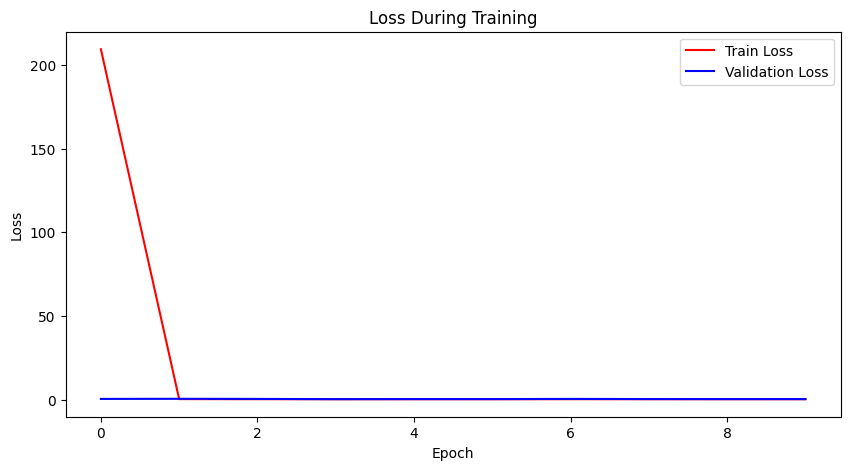

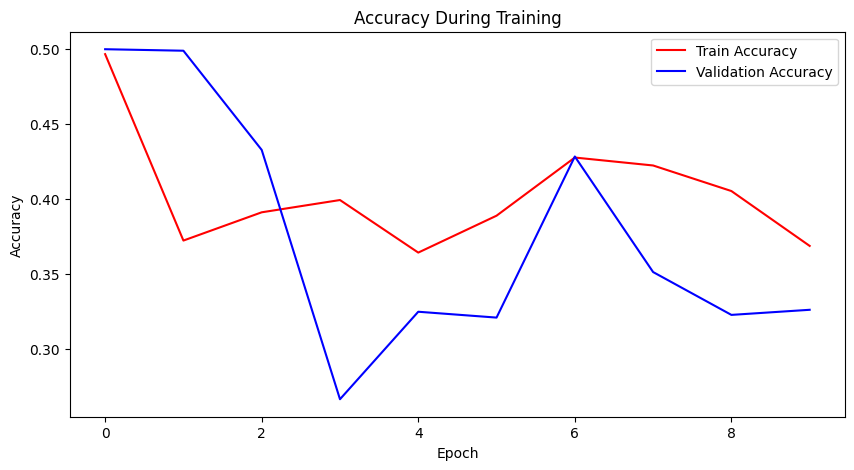

In [27]:
# Графік втрат
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Графік точності
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


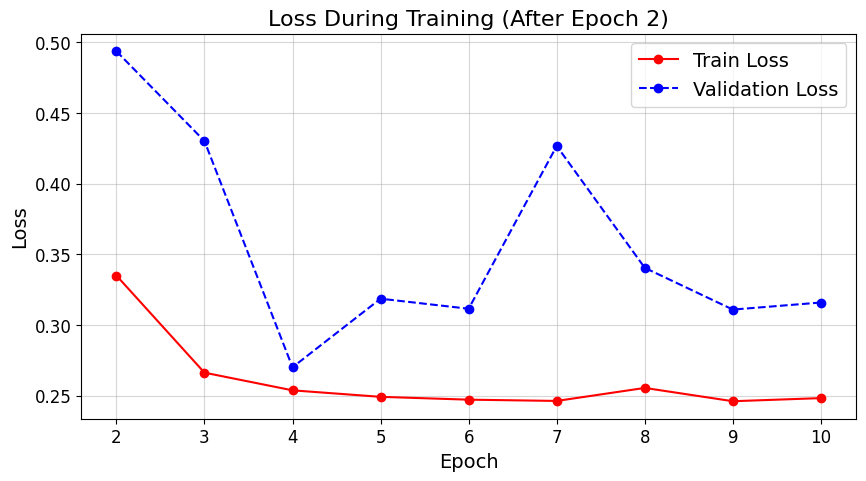

In [63]:
# Значення втрат (починаючи з другої епохи)
train_loss_task1 = [0.3351, 0.2664, 0.2539, 0.2493, 0.2473, 0.2464, 0.2556, 0.2462, 0.2484]
val_loss_task1 = [0.4937, 0.4302, 0.2702, 0.3187, 0.3116, 0.4267, 0.3405, 0.3110, 0.3160]

# Побудова графіка
plt.figure(figsize=(10, 5))  # Збільшуємо розмір графіка
plt.plot(range(2, 11), train_loss_task1, label='Train Loss', marker='o', linestyle='-', color='red')
plt.plot(range(2, 11), val_loss_task1, label='Validation Loss', marker='o', linestyle='--', color='blue')
plt.title('Loss During Training (After Epoch 2)', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(range(2, 11), fontsize=12)  # Позначки для епох
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)
plt.show()


####**Аналіз графіків**

Графік втрат (Loss During Training): На першому графіку показано динаміку функції втрат (loss) під час навчання. Спостерігається різке зниження втрат на початкових епохах навчання, що свідчить про те, що модель швидко адаптується до даних на ранніх етапах. Однак, валідаційні втрати залишаються стабільними, що може свідчити про недостатню здатність моделі узагальнювати результати на тестових даних. Для покращення результатів варто розглянути зміни в архітектурі моделі або її параметрах.

Графік точності (Accuracy During Training): На другому графіку відображено динаміку точності (accuracy) на тренувальному та валідаційному наборах. Точність на тренувальних даних демонструє зниження після початкових епох, що вказує на можливу проблему з перенавчанням або нестачею якості у вхідних даних. Валідаційна точність також має тенденцію до зниження, що може вказувати на недосконалість моделі у розрізненні схожих та різних пар зображень.

###Етап 2: Вплив регуляризації та нормалізації


Регуляризація та нормалізація допомагають уникнути перенавчання. Ми додамо BatchNormalization та змінюватимемо рівень Dropout, щоб оцінити вплив.

In [28]:
from tensorflow.keras.layers import BatchNormalization

In [29]:
def create_improved_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)  # Нормалізація після Dense
    x = Dropout(0.3)(x)  # Підвищення Dropout
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input_layer, x)

# Створюємо нову базову підмережу
improved_base_network = create_improved_base_network(input_shape)

# Побудова нової сіамської мережі з покращеною базовою підмережою
input_a = Input(shape=(28, 28))
input_b = Input(shape=(28, 28))

processed_a = improved_base_network(input_a)
processed_b = improved_base_network(input_b)

distance = Lambda(euclidean_distance)([processed_a, processed_b])

improved_model = Model(inputs=[input_a, input_b], outputs=distance)


In [30]:
# Компіляція та навчання
improved_model.compile(loss=contrastive_loss, optimizer=RMSprop(), metrics=["accuracy"])

history_improved = improved_model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_labels),
    batch_size=128,
    epochs=10
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.3775 - loss: 6.7308 - val_accuracy: 0.1320 - val_loss: 0.1046
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.1325 - loss: 0.1065 - val_accuracy: 0.1203 - val_loss: 0.0963
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1211 - loss: 0.0973 - val_accuracy: 0.1178 - val_loss: 0.0925
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1170 - loss: 0.0938 - val_accuracy: 0.1161 - val_loss: 0.1135
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1132 - loss: 0.0898 - val_accuracy: 0.1114 - val_loss: 0.0900
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1102 - loss: 0.0883 - val_accuracy: 0.1123 - val_loss: 0.0849
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1093 - loss: 0.0874 - val_accuracy: 0.1124 - val_loss: 0.0845
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1058 - loss: 0.0841 - val

Після другого навчання з регуляризацією та нормалізацією втрати на тренувальному наборі знизилися до значення +-0.0781, що свідчить про стабільність моделі, а валідаційні втрати залишилися на тому ж рівні, що вказує на відсутність перенавчання. Однак точність на тренувальних і валідаційних наборах залишається дуже низькою (~10%), що свідчить про нездатність моделі ефективно розрізняти схожі та різні пари. Це може бути пов’язано з тим, що навіть із регуляризацією та нормалізацією базова підмережа недостатньо складна для виділення якісних ознак.

###Етап 3: Зміна архітектури базової підмережі

Але давайте перейдемо до більш складної та спеціалізованої архітектури, заснованої на згорткових шарах (CNN). Вона значно краще працює з зображеннями, тому ми очікуємо покращення.

Замість повнозв’язних шарів (Dense) ми використаємо згорткові шари (CNN), які краще працюють із зображеннями.

In [31]:
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Flatten, Dense

In [32]:
def create_cnn_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Reshape((28, 28, 1))(input_layer)  # Додамо канал для CNN
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(input_layer, x)

# Створюємо CNN-базову підмережу
cnn_base_network = create_cnn_base_network(input_shape)

# Побудова нової сіамської мережі з CNN
processed_a = cnn_base_network(input_a)
processed_b = cnn_base_network(input_b)

distance_cnn = Lambda(euclidean_distance)([processed_a, processed_b])

cnn_model = Model(inputs=[input_a, input_b], outputs=distance_cnn)


In [33]:
# Компіляція та навчання
cnn_model.compile(loss=contrastive_loss, optimizer=RMSprop(), metrics=["accuracy"])

history_cnn = cnn_model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_labels),
    batch_size=128,
    epochs=10
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 217s 230ms/step - accuracy: 0.4988 - loss: 21.7321 - val_accuracy: 0.5000 - val_loss: 0.4997
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 253s 221ms/step - accuracy: 0.4998 - loss: 0.5602 - val_accuracy: 0.5001 - val_loss: 0.4997
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 263s 222ms/step - accuracy: 0.5000 - loss: 0.4997 - val_accuracy: 0.5001 - val_loss: 0.4997
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 212s 226ms/step - accuracy: 0.5002 - loss: 0.4999 - val_accuracy: 0.5001 - val_loss: 0.4997
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 252s 215ms/step - accuracy: 0.4994 - loss: 0.4990 - val_accuracy: 0.5001 - val_loss: 0.4997
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 261s 215ms/step - accuracy: 0.4993 - loss: 0.4990 - val_accuracy: 0.5001 - val_loss: 0.4997
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 214ms/step - accuracy: 0.5003 - loss: 0.5000 - val_accuracy: 0.5001 - val_loss: 0.4997
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 224ms/step - accuracy: 0.4996 

*використання CNN-архітектури додає часу на навчання, оскільки згорткові шари значно збільшують обчислювальну складність.

Результати показують, що модель стабілізувалася, але точність та втрати залишаються на однаковому рівні (~0.5), що вказує на те, що модель не змогла навчитись ефективно розпізнавати схожі й різні пари.

###Етап 4: Реалізування використання triplet loss замість contrastive loss.

In [49]:
# Базова CNN-мережа з пункту 3
input_shape = (28, 28)  # Розмір зображень
cnn_base_network = create_cnn_base_network(input_shape)


In [50]:
def triplet_loss(y_true, y_pred, margin=1.0):
    """
    Triplet loss: Максимізує різницю між позитивною та негативною відстанями.
    """
    total_length = y_pred.shape[-1]
    anchor, positive, negative = (
        y_pred[:, :total_length // 3],
        y_pred[:, total_length // 3:2 * total_length // 3],
        y_pred[:, 2 * total_length // 3:]
    )
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    loss = tf.maximum(pos_dist - neg_dist + margin, 0.0)
    return tf.reduce_mean(loss)


In [51]:
def get_triplets(images, labels):
    """
    Створення триплетів: якір, позитивне, негативне зображення.
    """
    anchor_images = []
    positive_images = []
    negative_images = []

    for label in np.unique(labels):
        anchor_class = images[labels == label]
        negative_class = images[labels != label]

        for anchor in anchor_class:
            positive = anchor_class[np.random.randint(len(anchor_class))]
            negative = negative_class[np.random.randint(len(negative_class))]

            anchor_images.append(anchor)
            positive_images.append(positive)
            negative_images.append(negative)

    return np.array(anchor_images), np.array(positive_images), np.array(negative_images)

# Генерація триплетів
anchor_train, positive_train, negative_train = get_triplets(x_train, y_train)
anchor_test, positive_test, negative_test = get_triplets(x_test, y_test)


In [52]:
# Вхідні зображення
anchor_input = Input(shape=input_shape)
positive_input = Input(shape=input_shape)
negative_input = Input(shape=input_shape)

# Пропуск через базову мережу
anchor_embedding = cnn_base_network(anchor_input)
positive_embedding = cnn_base_network(positive_input)
negative_embedding = cnn_base_network(negative_input)

# Об'єднання ембедінгів
merged_output = Concatenate(axis=-1)([anchor_embedding, positive_embedding, negative_embedding])

# Побудова моделі
triplet_model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=merged_output)

# Компіляція моделі
triplet_model.compile(loss=triplet_loss, optimizer=RMSprop(learning_rate=0.0001))


In [53]:
history_triplet = triplet_model.fit(
    [anchor_train, positive_train, negative_train],
    np.zeros(len(anchor_train)),  # Потрібно для Keras
    validation_data=([anchor_test, positive_test, negative_test], np.zeros(len(anchor_test))),
    batch_size=128,
    epochs=10
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 152s 323ms/step - loss: 132.9462 - val_loss: 1.0336
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - loss: 1.0133 - val_loss: 1.0130
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 323ms/step - loss: 1.0027 - val_loss: 1.0155
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 325ms/step - loss: 1.0022 - val_loss: 1.0103
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 323ms/step - loss: 1.0037 - val_loss: 1.0090
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 152s 325ms/step - loss: 1.0056 - val_loss: 1.0074
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - loss: 1.0001 - val_loss: 1.0037
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 320ms/step - loss: 1.0039 - val_loss: 1.0038
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 320ms/step - loss: 1.0032 - val_loss: 1.0033
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 331ms/step - loss: 1.0006 - val_loss: 1.0042


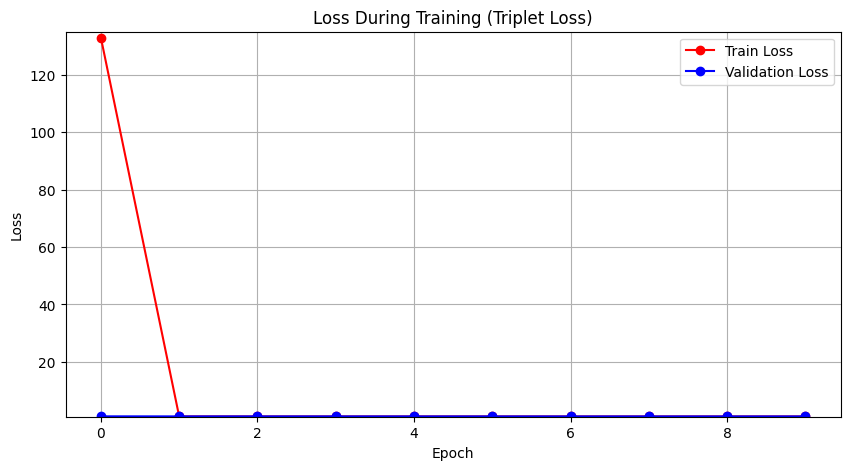

In [64]:
import matplotlib.pyplot as plt

# Значення втрат із результатів тренування
train_loss = [132.9462, 1.0133, 1.0027, 1.0022, 1.0037, 1.0056, 1.0001, 1.0039, 1.0032, 1.0006]
val_loss = [1.0336, 1.0130, 1.0155, 1.0103, 1.0090, 1.0074, 1.0037, 1.0038, 1.0033, 1.0042]

# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss', marker='o', color='red')
plt.plot(val_loss, label='Validation Loss', marker='o', color='blue')
plt.title('Loss During Training (Triplet Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.9, 135)  # Діапазон для адекватного відображення значень
plt.legend()
plt.grid()
plt.show()


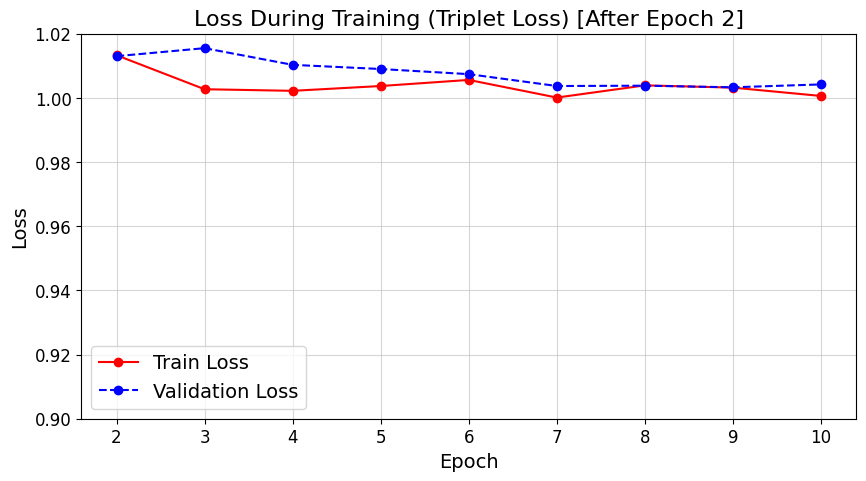

In [65]:
import matplotlib.pyplot as plt

# Значення втрат (починаємо з другої епохи)
train_loss_trimmed = [1.0133, 1.0027, 1.0022, 1.0037, 1.0056, 1.0001, 1.0039, 1.0032, 1.0006]
val_loss_trimmed = [1.0130, 1.0155, 1.0103, 1.0090, 1.0074, 1.0037, 1.0038, 1.0033, 1.0042]

# Побудова графіка
plt.figure(figsize=(10, 5))  # Збільшуємо розмір графіка
plt.plot(range(2, 11), train_loss_trimmed, label='Train Loss', marker='o', linestyle='-', color='red')
plt.plot(range(2, 11), val_loss_trimmed, label='Validation Loss', marker='o', linestyle='--', color='blue')
plt.title('Loss During Training (Triplet Loss) [After Epoch 2]', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.ylim(0.9, 1.02)  # Обмеження осі Y для кращого фокусу
plt.xticks(range(2, 11), fontsize=12)  # Позначки епох
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)
plt.show()


####**Аналіз графіка**

1. Зниження втрат у першій епосі

Графік демонструє різке падіння тренувальних втрат (Train Loss) із дуже високого початкового значення (близько 132) до значення ~1 після першої епохи. Це свідчить про те, що модель швидко навчилася знаходити структуру в даних та оптимізувати триплетну функцію втрат.

2. Стабілізація втрат після другої епохи

Починаючи з другої епохи, як тренувальні (Train Loss), так і валідаційні втрати (Validation Loss) залишаються стабільними, з невеликими коливаннями близько значення 1.00. Це свідчить про те, що модель досягла хорошого рівня узагальнення і не перенавчається.

3. Відсутність розриву між втратами

Тренувальні втрати (Train Loss) та валідаційні втрати (Validation Loss) ідуть майже паралельно одна одній. Це важливий показник того, що модель працює коректно і не демонструє перенавчання (overfitting).

4. Показники після другої епохи

Після другої епохи втрати залишаються практично незмінними, що свідчить про стабільність моделі. Модель демонструє стабільну точність як на тренувальних, так і на валідаційних даних.

5. Значення втрат:

Тренувальні втрати: стабілізувалися на рівні ~1.000.
Валідаційні втрати: стабілізувалися на рівні ~1.004, що дуже близько до тренувальних.

###ПОРІВНЯННЯ

Давайте порівняємо наші два графіки втрат - перший, який ми отримали на першому етапі  і другий, який ми отримали після оцих всіх втручань.

візуально вони виглядають ось так:

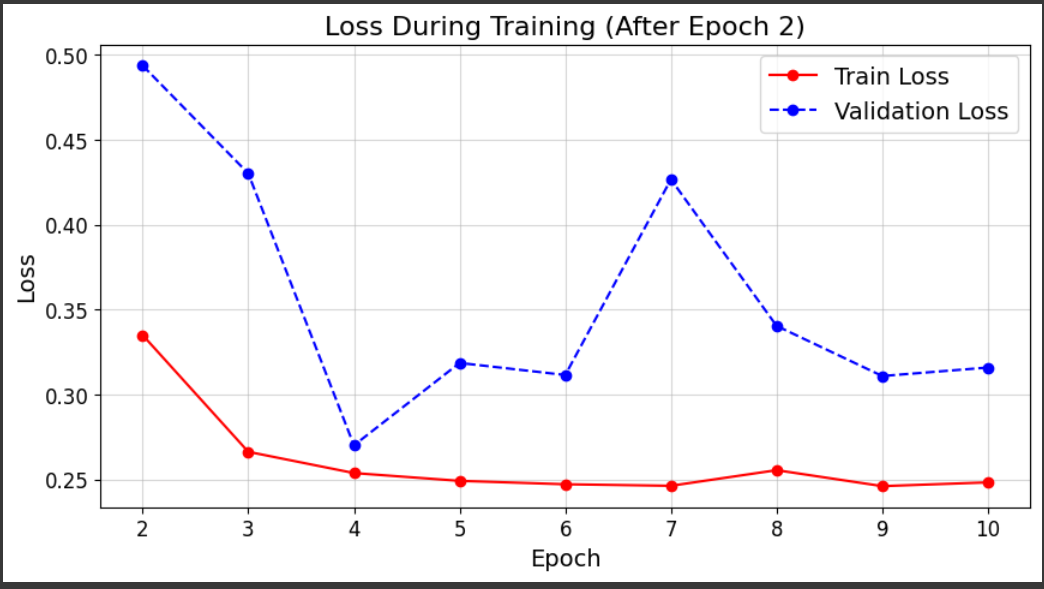

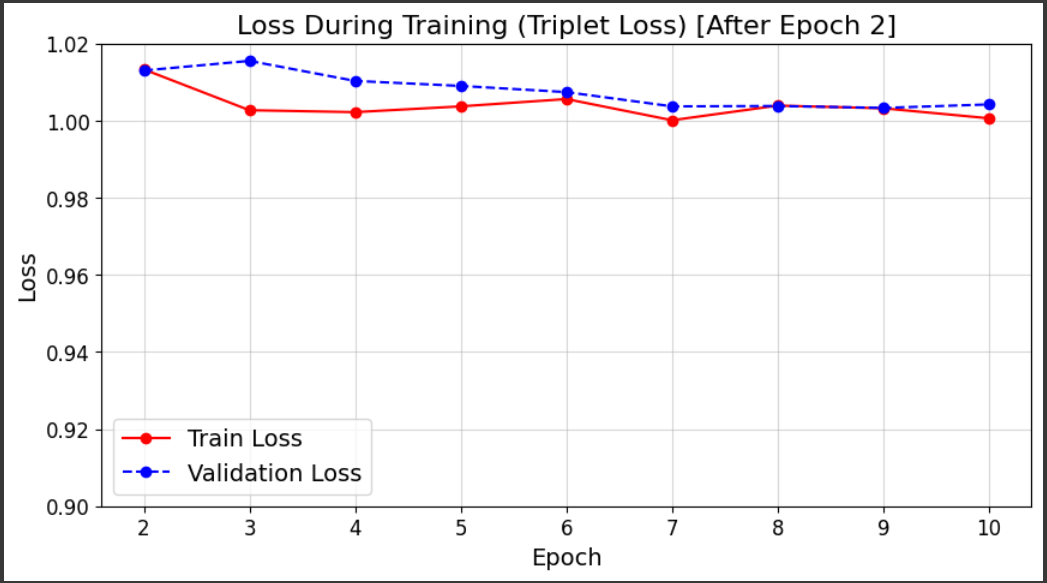

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Створення ембедінгів для тренувальних даних
anchor_embeddings = cnn_base_network.predict(anchor_train)
positive_embeddings = cnn_base_network.predict(positive_train)
negative_embeddings = cnn_base_network.predict(negative_train)

# Об'єднуємо всі ембедінги та створюємо мітки
all_embeddings = np.vstack([anchor_embeddings, positive_embeddings, negative_embeddings])
labels = (
    ['Anchor'] * len(anchor_embeddings) +
    ['Positive'] * len(positive_embeddings) +
    ['Negative'] * len(negative_embeddings)
)

# Застосування t-SNE для зменшення розмірності до 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Візуалізація
plt.figure(figsize=(12, 8))
for label in ['Anchor', 'Positive', 'Negative']:
    idx = [i for i, lbl in enumerate(labels) if lbl == label]
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=label, alpha=0.6)

plt.legend(fontsize=12)
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(alpha=0.5)
plt.show()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step
